In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import layers
from keras import models
from keras import callbacks
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/Giso Lab/Documents/USC') # set the directory input files are in
df = pd.DataFrame(columns = [])
# features = np.zeros(100)
features2D = np.zeros((100,1,1,1))
targets2D = np.zeros((100,33,33,2))
t=0
for i in glob.glob("velocity_*.csv"):
    st = i.find('_')
    ed = i.find('.')
    features2D[t,0,0,0] = int(i[st+1:ed]) * 50
    tmp = np.loadtxt(i, delimiter=',', skiprows=1)
    targets2D[t,:,:,0] = tmp[:1089,1].reshape(33,33)
    targets2D[t,:,:,1] = tmp[:1089,2].reshape(33,33)
    t+=1

In [3]:
# change the shape for visualization
targets2D = targets2D[:,1:33,1:33,:]

In [4]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(features2D, targets2D, train_size=0.9)

Epoch 1/500
3/3 [==============================] - 21s 32ms/step - loss: 1.4152
Epoch 2/500
3/3 [==============================] - 0s 31ms/step - loss: 0.6507
Epoch 3/500
3/3 [==============================] - 0s 31ms/step - loss: 0.3692
Epoch 4/500
3/3 [==============================] - 0s 30ms/step - loss: 0.2462
Epoch 5/500
3/3 [==============================] - 0s 31ms/step - loss: 0.1823
Epoch 6/500
3/3 [==============================] - 0s 32ms/step - loss: 0.1429
Epoch 7/500
3/3 [==============================] - 0s 31ms/step - loss: 0.1134
Epoch 8/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0949
Epoch 9/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0806
Epoch 10/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0696
Epoch 11/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0630
Epoch 12/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0569
Epoch 13/500
3/3 [==============================

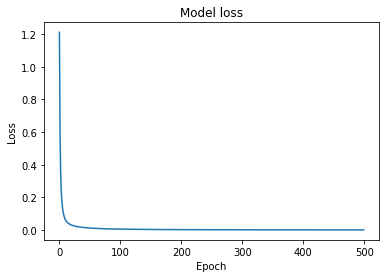

In [5]:
# set model referring Zhou and Ooka (2020) but can try anything!
model = Sequential()
# 1 x 1 x 8
model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(BatchNormalization())
# 2 x 2 x 8
model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(BatchNormalization())
# 4 x 4 x 8
model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(BatchNormalization())
# 8 x 8 x 16
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(BatchNormalization())
# 16 x 16 x 8
model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(BatchNormalization())
# 32 x 32 x 2
model.add(layers.Conv2D(2, kernel_size=(3, 3),activation='linear', padding='same'))
model.compile(optimizer='adam',loss='mean_squared_error')

# train
history = model.fit(x_train, y_train, epochs=500, batch_size=32)

# predict the labels of test data
pred = model.predict(x_test)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [6]:
def draw_heatmap(data1,data2,Re,uw):
    fig = plt.figure(figsize=(10.0, 5.0))
    if uw == 0:
        name, vmin, vmax = 'U', -0.1, 0.8
    elif uw == 1:
        name, vmin, vmax = 'W', -0.2, 0.2
    else:
        print('ERROR! Please set 0 for u and 1 for w')

    ax1 = fig.add_subplot(1,2,1)
    heatmap = ax1.pcolor(data1, cmap='jet', vmin=vmin, vmax=vmax)
    ax1.set_title('DNN for '+name+' at Re= '+str(Re))

    ax2 = fig.add_subplot(1,2,2)
    heatmap = ax2.pcolor(data2, cmap='jet', vmin=vmin, vmax=vmax)
    ax2.set_title('CFD for '+name+' at Re= '+str(Re))

    os.makedirs('img/CNN', exist_ok=True)
    plt.savefig('img/CNN/image_CNN_'+name+'_'+str(Re)+'.png') # set img folder
    plt.show()
    
    return heatmap

In [8]:
# change the shape for visualization
CFD = y_test
DNN = pred

In [9]:
np.shape(CFD)

(10, 32, 32, 2)

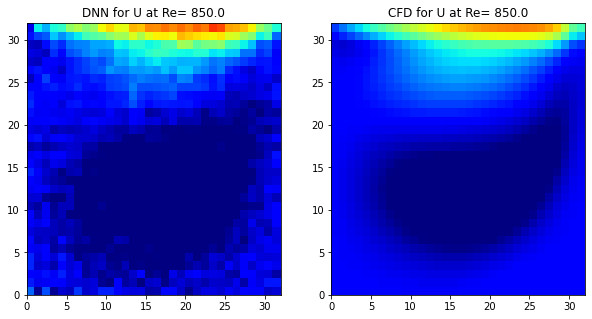

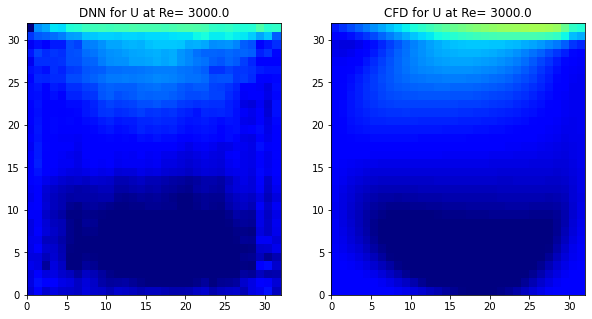

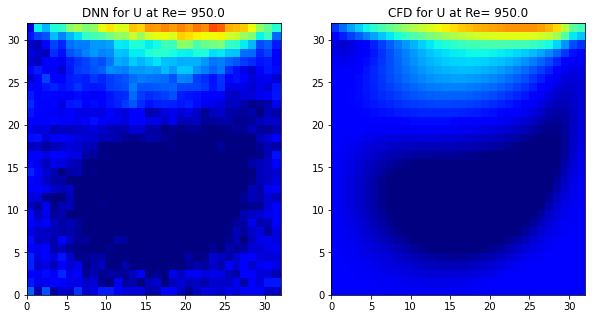

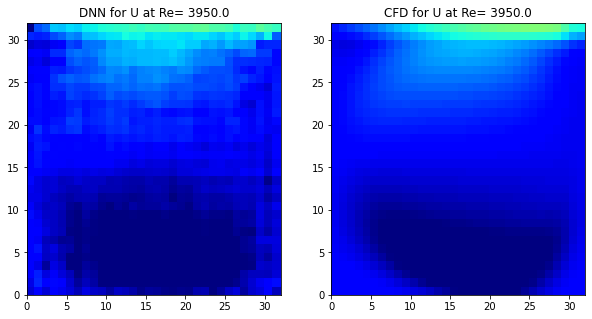

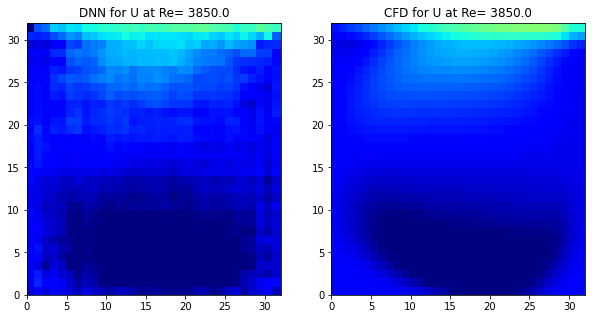

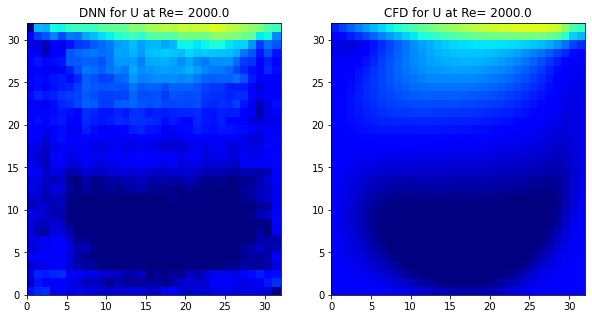

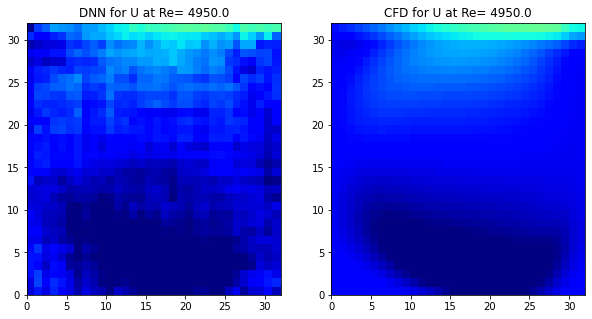

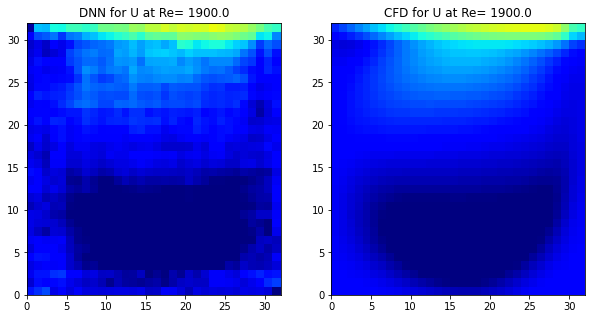

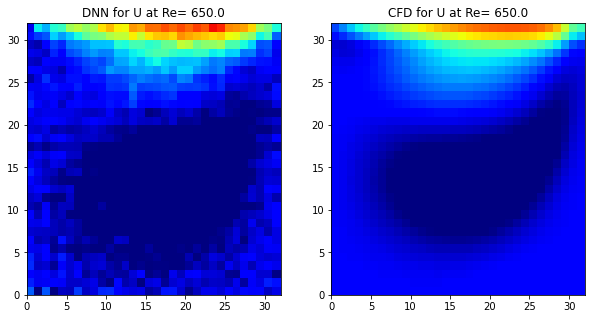

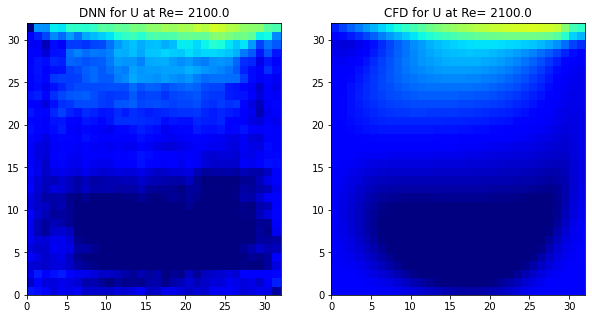

In [10]:
for i in range(np.size(x_test[:,0,0,0])):
    draw_heatmap(DNN[i,:,:,0],CFD[i,:,:,0],x_test[i,0,0,0],0)

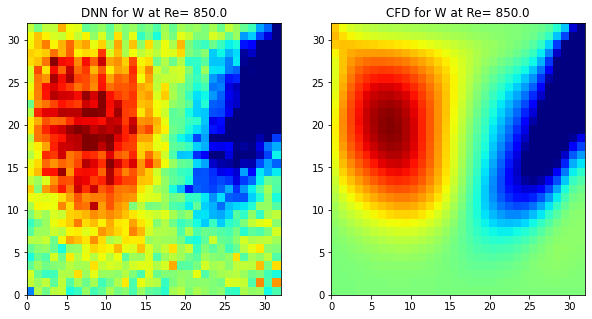

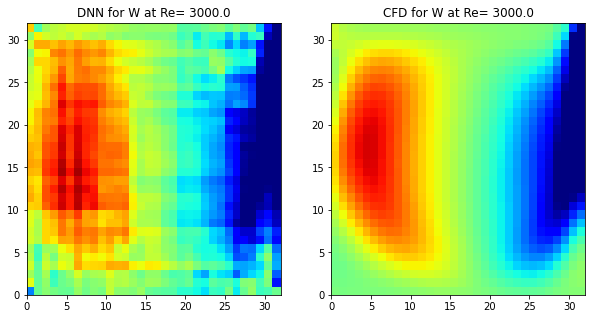

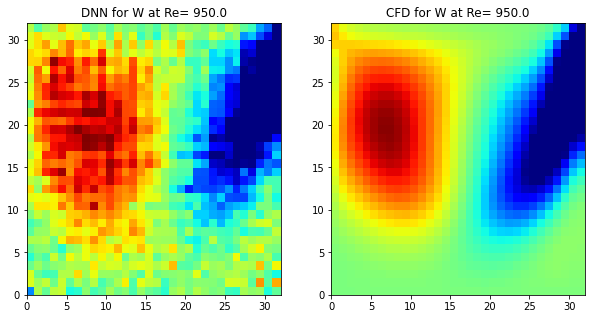

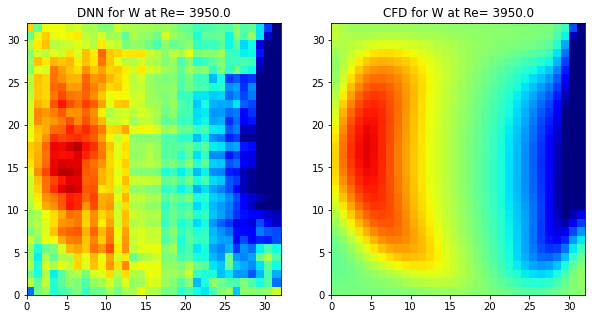

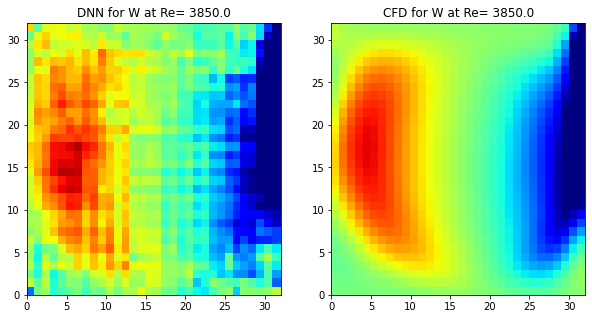

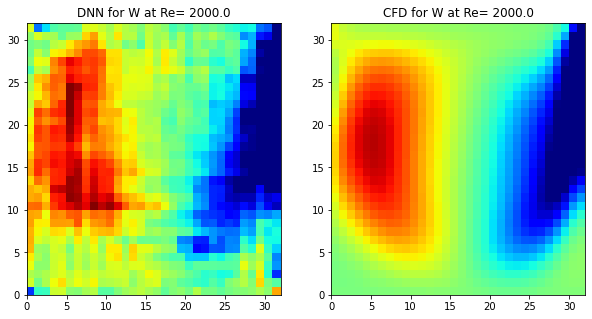

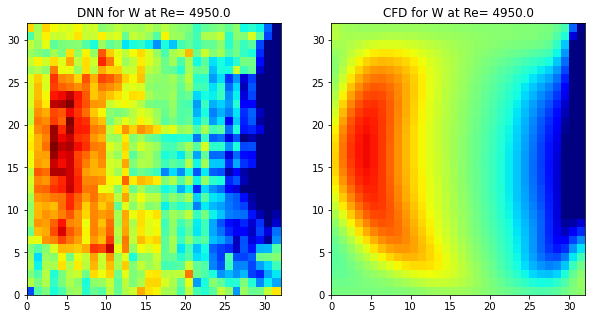

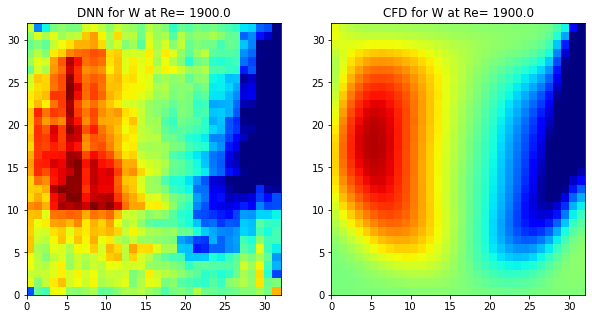

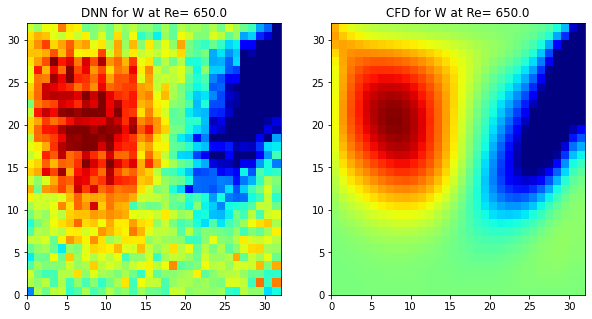

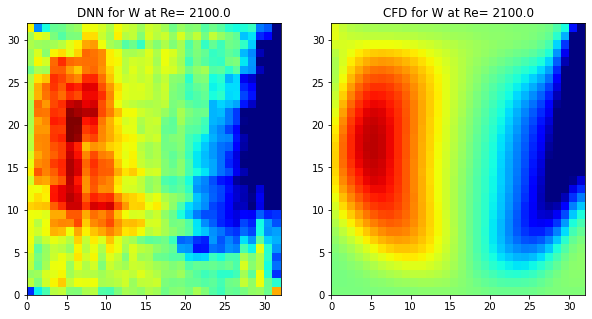

In [11]:
for i in range(np.size(x_test[:,0,0,0])):
    draw_heatmap(DNN[i,:,:,1],CFD[i,:,:,1],x_test[i,0,0,0],1)

In [ ]:
def draw_heatmap_u(data1,data2,Re):
    fig = plt.figure(figsize=(10.0, 5.0))
    name, vmin, vmax = 'U', -0.1, 0.8

    ax1 = fig.add_subplot(1,2,1)
    heatmap = ax1.pcolor(data1, cmap='jet', vmin=vmin, vmax=vmax)
    ax1.set_title('DNN for '+name+' at Re= '+str(Re))

    ax2 = fig.add_subplot(1,2,2)
    heatmap = ax2.pcolor(data2, cmap='jet', vmin=vmin, vmax=vmax)
    ax2.set_title('CFD for '+name+' at Re= '+str(Re))

    os.makedirs('img/CNN', exist_ok=True)
    plt.savefig('img/CNN/image_CNN_'+name+'_'+str(Re)+'.png') # set img folder
    plt.show()
    
    return heatmap

# for i in range(np.size(x_test[:,0,0,])):
#     draw_heatmap_u(DNN[i,:,:],CFD[i,:,:],x_test[i,0,0])